# Botnet Detection Using Machine Learning

In [23]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt


In [24]:
x_train = pd.read_csv( "X_Train_Dataset.csv")
y_train = pd.read_csv( "Y_Train_Dataset.csv")
x_test = pd.read_csv(  "X_Test_Dataset.csv")
y_test = pd.read_csv( "Y_Test_Dataset.csv")

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10354, 7)
(10354, 2)
(2590, 7)
(2590, 2)


In [26]:
x_train.head(10)

,Unnamed: 0,Dst IP Addr:Port,Durat,Flags,Flows,Packets Bytes,Prot
0,171,194.108.204.27:44728,4.974,PA_,1444,4,TCP
1,5028,147.32.80.9:53,0.000,INT,89,1,UDP
2,6071,147.102.3.36:45035,0.000,INT,179,1,UDP
3,3020,24.59.84.197:36116,0.000,INT,71,1,UDP
4,5606,147.32.84.229:13363,0.000,INT,77,1,UDP
5,1490,62.44.1.26:8000,4.917,A_,2244,34,TCP
6,4046,183.97.82.238:32816,0.499,PA_,129,2,TCP
7,3144,94.208.151.88:49974,0.000,INT,182,1,UDP
8,2940,109.208.128.49:1089,0.095,PA_,120,2,TCP
9,4494,77.78.99.23:80,3.096,SRPA_,1276,5,TCP


In [27]:
y_train.head()

,Unnamed: 0,0
0,171,0
1,5025,0
2,6068,0
3,3017,0
4,5603,0


In [28]:
x_train = x_train.drop(labels = [  "Unnamed: 0"] ,axis = 1 )
x_test = x_test.drop(labels = [  "Unnamed: 0"] ,axis = 1 )
y_train = y_train.drop(labels = [ "Unnamed: 0"] ,axis = 1 )
y_test = y_test.drop(labels = [  "Unnamed: 0"] ,axis = 1 )

In [29]:
x_train.head()


,Dst IP Addr:Port,Durat,Flags,Flows,Packets Bytes,Prot
0,194.108.204.27:44728,4.974,PA_,1444,4,TCP
1,147.32.80.9:53,0.000,INT,89,1,UDP
2,147.102.3.36:45035,0.000,INT,179,1,UDP
3,24.59.84.197:36116,0.000,INT,71,1,UDP
4,147.32.84.229:13363,0.000,INT,77,1,UDP


In [30]:
y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [31]:
y = x_train["Dst IP Addr:Port"].str.split(":")

In [32]:
y = pd.Series(y)

In [33]:
x_train["Dst IP Addr:Port"] = y.str.get(1)

In [34]:
x_train.dtypes

Dst IP Addr:Port     object
Durat               float64
Flags                object
Flows                 int64
Packets Bytes         int64
Prot                 object
dtype: object

In [35]:
x_train.head()


,Dst IP Addr:Port,Durat,Flags,Flows,Packets Bytes,Prot
0,44728,4.974,PA_,1444,4,TCP
1,53,0.000,INT,89,1,UDP
2,45035,0.000,INT,179,1,UDP
3,36116,0.000,INT,71,1,UDP
4,13363,0.000,INT,77,1,UDP


In [36]:
x_train["Dst IP Addr:Port"] = pd.to_numeric(x_train["Dst IP Addr:Port"],errors='coerce')

In [37]:
y1 = x_test["Dst IP Addr:Port"].str.split(":")
y1 = pd.Series(y1)
x_test["Dst IP Addr:Port"] = y1.str.get(1)
x_test["Dst IP Addr:Port"] = pd.to_numeric(x_test["Dst IP Addr:Port"],errors='coerce')

In [38]:
x_train['Flags'].value_counts()

INT       3662
S_        1526
PA_       1102
ECR        514
RA_        505
ECO        480
UNK        425
A_         397
FA_        204
SPA_       190
_FSPA      154
FSPA_      107
RTA        101
TSR         99
IRQ         96
SA_         96
RTS         96
TST         93
IRR         91
MSR         88
MAS         88
URP         41
SRPA_       33
FPA_        30
R_          18
ROB         15
RED         12
FSRPA_       9
SRA_         5
URH          5
NNS          4
TXD          4
NNA          4
NRA          4
MHR          4
TRC          4
AHA          3
MRQ          3
IAH          3
FSA_         3
SKP          3
MRP          2
PAR          2
FRPA_        2
RPA_         2
WAY          2
_FSA         2
CON          2
DNP          2
URN          1
DCE          1
FSRA_        1
URFIL        1
_FSRPA       1
NRS          1
UR           1
SRC          1
PHO          1
FRA_         1
SEC          1
Name: Flags, dtype: int64

# Encoding of Train Data

In [39]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
x_train['Flags']= label_encoder.fit_transform(x_train['Flags'].astype(str)) 
  
x_train['Flags'].unique() 


array([29, 16,  1, 44, 41,  8, 58,  5,  7, 13, 38, 45, 31, 12, 55, 14, 57,
       53, 11,  9, 37, 32, 42,  2, 10,  6, 25, 49, 34, 52, 59, 54, 50, 33,
       35, 19, 17, 18, 48, 47, 36, 23,  4, 60, 21, 22, 20, 46,  0, 43, 26,
       30, 40, 28,  3, 24, 39, 15, 56, 51, 27], dtype=int64)

In [40]:
x_train['Prot']= label_encoder.fit_transform(x_train['Prot'].astype(str)) 
x_train['Prot'].unique() 

array([6, 7, 2, 0, 5, 4, 3, 1], dtype=int64)

# Encoding of Test Data

In [41]:
x_test['Flags']= label_encoder.fit_transform(x_test['Flags'].astype(str)) 
  
x_test['Flags'].unique() 

x_test['Prot']= label_encoder.fit_transform(x_test['Prot'].astype(str)) 
  
x_test['Prot'].unique() 

array([5, 4, 1, 3, 2, 0], dtype=int64)

In [42]:
x_train["Dst IP Addr:Port"] =x_train["Dst IP Addr:Port"].fillna(0)
x_test["Dst IP Addr:Port"] =x_test["Dst IP Addr:Port"].fillna(0)

In [44]:
x_train.head()

,Dst IP Addr:Port,Durat,Flags,Flows,Packets Bytes,Prot
0,44728.0,4.974,29,1444,4,6
1,53.0,0.000,16,89,1,7
2,45035.0,0.000,16,179,1,7
3,36116.0,0.000,16,71,1,7
4,13363.0,0.000,16,77,1,7


# ML Model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# SVM

In [46]:
parameters1 = [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]
parameters1

[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]

In [47]:
from sklearn import svm
clf = svm.SVC(C = 1 ,kernel='rbf' , gamma = 'scale' )
clf.fit(x_train, y_train.to_numpy().ravel()) 
yhat = clf.predict(x_test)
print('Support Vector Machine Accuracy Score:',round(accuracy_score(y_test,yhat)*100),'%')

Support Vector Machine Accuracy Score: 67.0 %


In [48]:
acc_max = 0
c_max = 0
def best_hyperparameter_svm(parameters):
    acc_max = 0
    c_max = 0
    for i in range(len(parameters)) :
        
        clf = svm.SVC(C = parameters[i] ,kernel='rbf' , gamma = 'scale' )
        clf.fit(x_train, y_train.to_numpy().ravel()) 
        yhat = clf.predict(x_test)
        curr = round( accuracy_score(y_test,yhat)*100 )
        if(curr>acc_max):
            acc_max = curr
            c_max = i
    return c_max
best = parameters1[best_hyperparameter_svm(parameters1)]

In [49]:
print(best)
from sklearn import svm
clf = svm.SVC(C = best ,kernel='rbf',gamma = 'scale'  )
clf.fit(x_train, y_train.to_numpy().ravel()) 
yhat = clf.predict(x_test)
print('Support Vector Machine Accuracy Score AFTER Tuning :',round(accuracy_score(y_test,yhat)*100),'%')

0.001
Support Vector Machine Accuracy Score AFTER Tuning : 75.0 %


In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" )

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.81      0.64      0.72      1295
           1       0.71      0.85      0.77      1295

    accuracy                           0.75      2590
   macro avg       0.76      0.75      0.75      2590
weighted avg       0.76      0.75      0.75      2590

Confusion matrix, without normalization
[[ 834  461]
 [ 191 1104]]


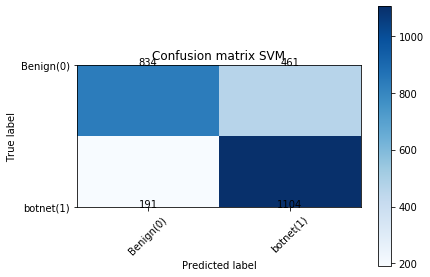

In [52]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(0)','botnet(1)'],normalize= False,  title='Confusion matrix SVM')

In [53]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 
print('Support Vector Machine Accuracy Score:',round(accuracy_score(y_test,yhat)*100),'%')

Support Vector Machine Accuracy Score: 75.0 %


# Logistic Regression

In [54]:
Logistic_model = LogisticRegression(solver = 'liblinear' ,C=1)
Logistic_model.fit(x_train,y_train.to_numpy().ravel())
prediction_Logistic = Logistic_model.predict(x_test)
print('Logistic Regression Accuracy Score:',round(accuracy_score(y_test,prediction_Logistic)*100),'%')

Logistic Regression Accuracy Score: 76.0 %


In [55]:
acc_max = 0
c_max = 0
def best_hyperparameter(parameters):
    acc_max = 0
    c_max = 0
    for i in range(len(parameters)) :
        Logistic_model = LogisticRegression( solver = 'liblinear' ,C=parameters[i] )
        Logistic_model.fit(x_train,y_train.to_numpy().ravel())
        prediction_Logistic = Logistic_model.predict(x_test)
        curr = round( accuracy_score(y_test,prediction_Logistic)*100 )
        if(curr>acc_max):
            acc_max = curr
            c_max = i
    return c_max
best = parameters1[best_hyperparameter(parameters1)]

In [56]:
print(best)
Logistic_model = LogisticRegression(solver = 'liblinear' ,C=best)
Logistic_model.fit(x_train,y_train.to_numpy().ravel())
prediction_Logistic = Logistic_model.predict(x_test)
print('Logistic Regression Accuracy Score after tuning :',round(accuracy_score(y_test,prediction_Logistic)*100),'%')

0.001
Logistic Regression Accuracy Score after tuning : 80.0 %


              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1295
           1       0.83      0.76      0.80      1295

    accuracy                           0.80      2590
   macro avg       0.81      0.80      0.80      2590
weighted avg       0.81      0.80      0.80      2590

Confusion matrix, without normalization
[[1095  200]
 [ 308  987]]


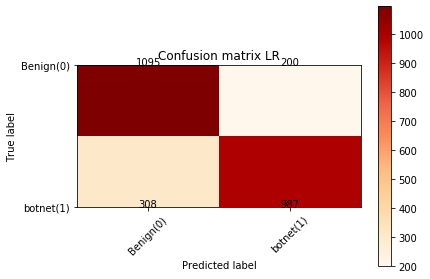

In [57]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction_Logistic, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, prediction_Logistic))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(0)','botnet(1)'],normalize= False,  title='Confusion matrix LR' , cmap=plt.cm.OrRd )

# XGBOOST

In [58]:
import xgboost as xgb
from xgboost import XGBClassifier
model=xgb.XGBClassifier(random_state=5 , earning_rate=0.001)
model.fit(x_train, y_train)
yhat_xg = model.predict(x_test)
print('XGBoost Accuracy Score after tuning :',round(accuracy_score(y_test,yhat_xg)*100),'%')

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoost Accuracy Score after tuning : 83.0 %


              precision    recall  f1-score   support

           0       0.75      0.99      0.86      1295
           1       0.99      0.67      0.80      1295

    accuracy                           0.83      2590
   macro avg       0.87      0.83      0.83      2590
weighted avg       0.87      0.83      0.83      2590

Normalized confusion matrix
[[0.99 0.01]
 [0.33 0.67]]


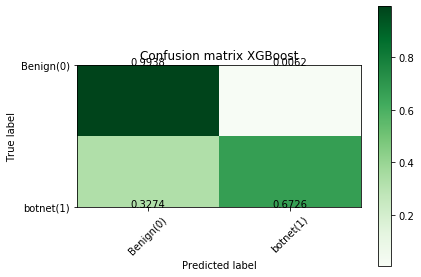

In [59]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_xg, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_xg ))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(0)','botnet(1)'],normalize= True,  title='Confusion matrix XGBoost' ,cmap=plt.cm.Greens)

# Random Forest Classifier


In [60]:
Random_forest_model = RandomForestClassifier(class_weight='balanced',max_depth = 4,random_state=4)
Random_forest_model.fit(x_train,y_train.to_numpy().ravel())
prediction_Random_forest_model = Random_forest_model.predict(x_test)
print('Random Forest Accuracy Score:',round(accuracy_score(y_test,prediction_Random_forest_model)*100),'%')

Random Forest Accuracy Score: 88.0 %


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1295
           1       1.00      0.77      0.87      1295

    accuracy                           0.88      2590
   macro avg       0.91      0.88      0.88      2590
weighted avg       0.91      0.88      0.88      2590

Normalized confusion matrix
[[0.99 0.01]
 [0.33 0.67]]


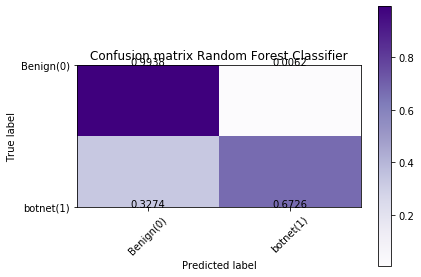

In [62]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_xg, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test,prediction_Random_forest_model ))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(0)','botnet(1)'],normalize= True,  title='Confusion matrix Random Forest Classifier' ,cmap=plt.cm.Purples)